In [1]:
# Standard data science libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils
import glob
import os
import time
        

In [2]:
plt.rcParams['figure.figsize'] = [11, 11]

In [3]:
from scipy.io import loadmat

In [6]:
weights = loadmat('ex3weights.mat')
theta1 = weights['Theta1']
theta2 = weights['Theta2']
data = loadmat('ex3data1.mat')
X = data['X']
y = data['y']

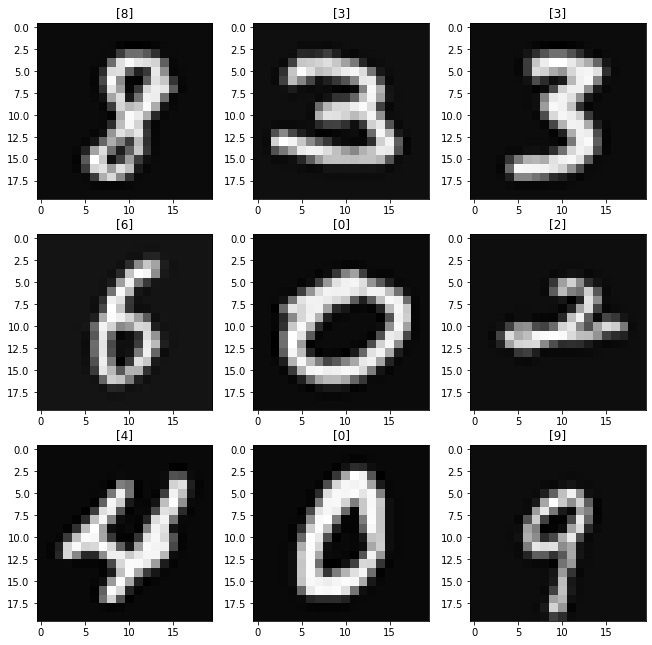

In [23]:
size = len(X)
for i in range(9):
    plt.subplot(3, 3, i+1)
    idx = np.random.randint(0, size)
    plt.title(y[idx] % 10)
    plt.imshow(X[idx].reshape(20, 20).T, cmap='gray')

In [24]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [32]:
def forward(X, theta1, theta2):
    size = len(X)
    out = np.concatenate((np.ones((size, 1)), X), axis=1)
    out = sigmoid(out.dot(theta1.T))
    size = len(out)
    out = np.concatenate((np.ones((size, 1)), out), axis=1)
    out = sigmoid(out.dot(theta2.T))
    return out

In [35]:
out = forward(X, theta1, theta2)

In [43]:
def predict(X):
    out = forward(X, theta1, theta2)
    return (np.argmax(out, axis=1) + 1) % 10

In [54]:
pred = predict(X)

array([9, 9, 9, ..., 8, 8, 8])

In [55]:
acc = pred == (y.ravel() % 10)

In [57]:
acc.sum() / size

0.9752